# Clone the git

In [1]:
!git clone https://github.com/Ikromov247/capstone2023.git

Cloning into 'capstone2023'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 53 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (53/53), 27.53 MiB | 21.15 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Paths to the file

In [3]:
file_path1 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(101지점).xls.xlsx'
file_path2 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(102지점).xls.xlsx'
file_path3 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(103지점).xls.xlsx'
file_path4 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(104지점).xls.xlsx'
file_path5 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(105지점).xls.xlsx'
file_path6 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(106지점).xls.xlsx'
file_path7 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(107지점).xls.xlsx'
file_path8 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(108지점).xls.xlsx'
file_path9 = '/content/drive/MyDrive/Blue_sky_project_dataset/2022-12-01-2023-07-01(109지점).xls.xlsx'

In [4]:
# df1 = pd.read_excel(file_path1)
# df2 = pd.read_excel(file_path2)
# df3 = pd.read_excel(file_path3)
# df4 = pd.read_excel(file_path4)
# df5 = pd.read_excel(file_path5)
# df6 = pd.read_excel(file_path6)
# df7 = pd.read_excel(file_path7)
# df8 = pd.read_excel(file_path8)



# Read the File

In [120]:
df9 = pd.read_excel(file_path9, parse_dates= ['시간'])

In [70]:
# df9.set_index('시간', inplace=True)
df9.tail()
df9

,ou,NH3,H2S,TVOCs,pozip,temperature,humidity,winddirection,windspeed,atm
시간,,,,,,,,,,
2022-12-12 16:33:00,1.8,0.836,0.369,0.100,0,6.9,6.3,남,1.0,0
2022-12-12 16:39:00,1.6,0.828,0.353,0.098,0,6.9,6.3,남남동,2.2,0
2022-12-12 16:44:00,1.4,0.821,0.338,0.098,0,6.9,6.3,남,1.0,0
2022-12-12 16:49:00,1.3,0.815,0.326,0.097,0,6.9,6.3,남남동,1.4,0
2022-12-12 16:54:00,1.2,0.809,0.323,0.096,0,6.9,6.4,남,1.1,0
...,...,...,...,...,...,...,...,...,...,...
2023-07-01 23:44:00,4.2,0.622,0.000,0.022,0,24.6,8.7,북,0.0,0
2023-07-01 23:49:00,4.3,0.621,0.000,0.022,0,24.6,8.8,북,0.0,0
2023-07-01 23:54:00,4.1,0.623,0.000,0.022,0,24.5,8.8,북,0.0,0


# Heat Map

<ipython-input-34-bf495cd6dd2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df9.corr()


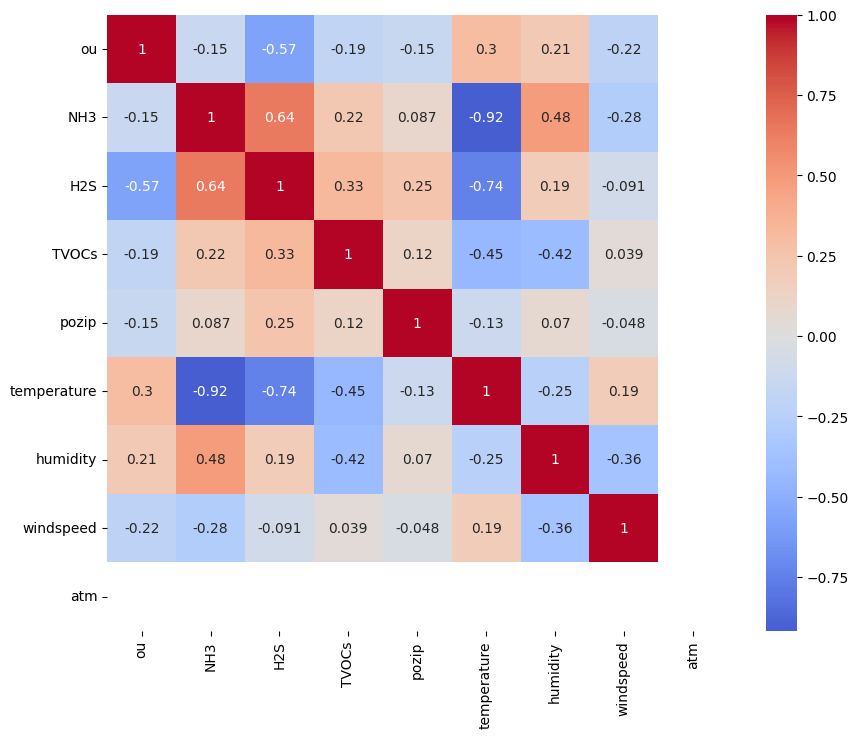

In [34]:
#heat-map

correlation = df9.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.show()

# Normalization

In [121]:
# indx15 = df9["ou"][df9["ou"] > 15].index

# for i in indx15:
#   if df9['ou'][i] > 15:
#     df9["ou"][i] = 15


# df9['ou'] = df9["ou"] / 15

# df9['humidity'] = df9["humidity"] / 10

# df9["temperature"] = (df9["temperature"] - df9["temperature"].mean()) / (df9["temperature"].max() - df9["temperature"].min())

<ipython-input-121-d7cbd94750e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9["ou"][i] = 15


In [123]:
df9.describe()

,ou,NH3,H2S,TVOCs,pozip,temperature,humidity,windspeed,atm
count,55893.000000,55893.000000,55893.000000,55893.000000,55893.000000,55893.000000,55893.000000,55893.000000,55893.0
mean,0.243803,0.726118,0.078564,0.073722,0.183476,0.000000,0.640520,0.679777,0.0
std,0.135477,0.130831,0.116482,0.024290,1.118342,0.213353,0.225663,0.814603,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.504383,0.000000,0.000000,0.0
25%,0.153333,0.639000,0.000000,0.070000,0.000000,-0.176139,0.480000,0.100000,0.0
50%,0.233333,0.749000,0.002000,0.085000,0.000000,-0.006292,0.660000,0.400000,0.0
75%,0.313333,0.822000,0.215000,0.087000,0.000000,0.184548,0.840000,1.000000,0.0
max,1.000000,1.014000,0.369000,0.186000,7.000000,0.495617,1.000000,9.400000,0.0


# Time series graph


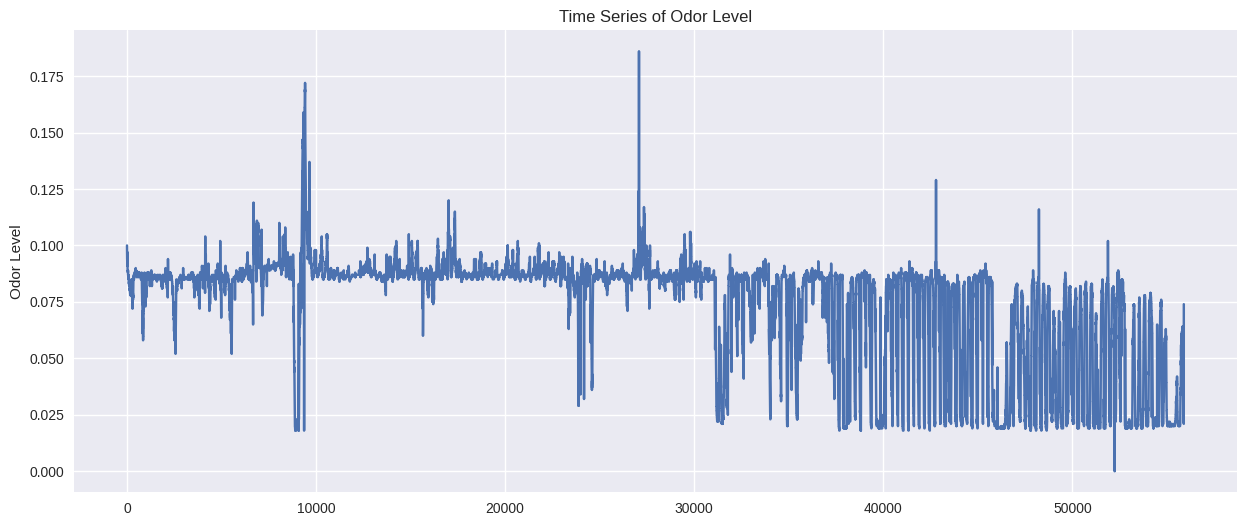

In [124]:
plt.figure(figsize=(15, 6))
df9['TVOCs'].plot(title='Time Series of Odor Level')
plt.ylabel('Odor Level')
plt.grid(True)
plt.show()

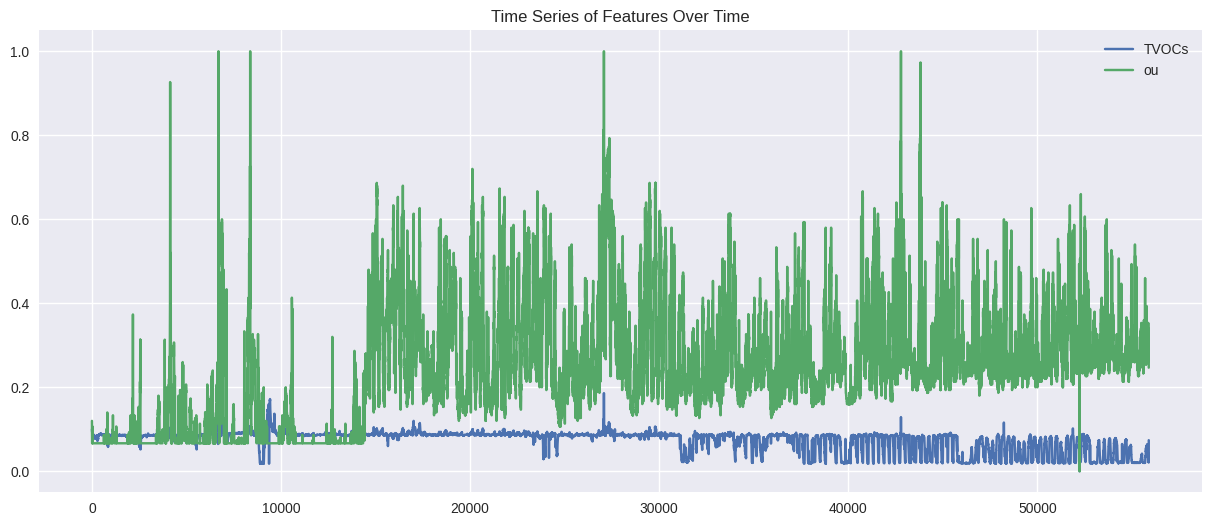

In [125]:
plt.figure(figsize=(15, 6))
for column in df9.columns:
    if column not in ['시간', 'NH3', 'ou', 'temperature', 'pozip', 'humidity', 'H2S',
       'winddirection', 'windspeed', 'atm']:  # Excluding the target variable or others as needed
        df9[column].plot(label=column)
df9["ou"].plot(label="ou")
plt.title('Time Series of Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
df9['시간'] = pd.to_datetime(df9['시간'])

In [78]:
df9.drop(55892, axis=0, inplace=True)

# Time Series with different time intervals

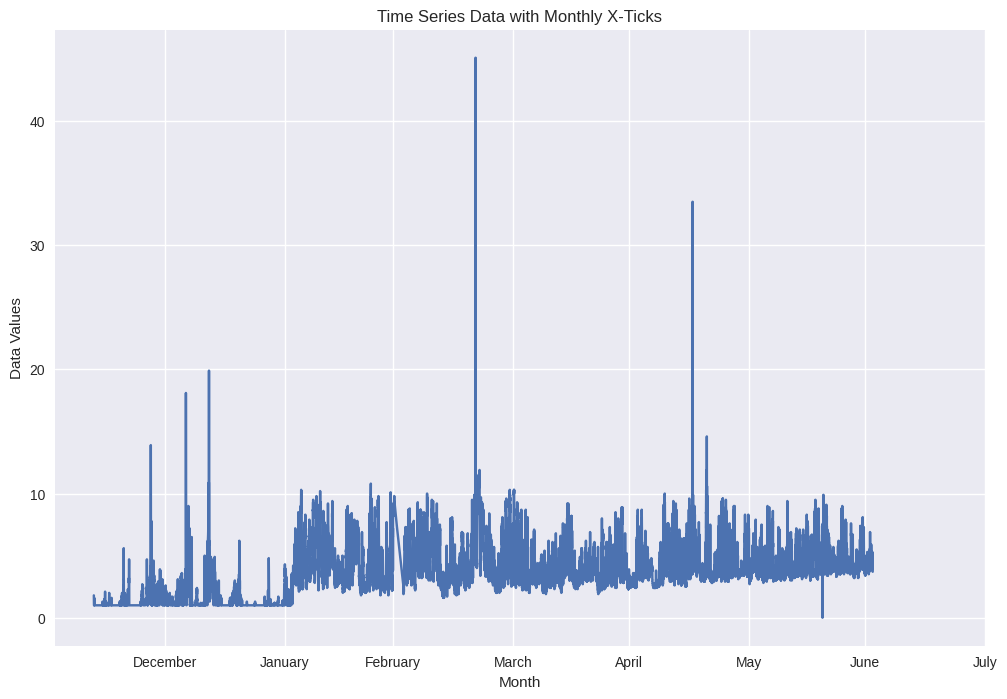

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters

# Sample time series data (replace this with your own data)
# Assuming 'timestamps' is a list of datetime objects with 5-minute intervals
# For example: timestamps = pd.date_range(start='2023-01-01', end='2023-10-12', freq='5T')
# timestamps = pd.date_range(start='2022-12-12 16:33:00', end='2023-10-12', freq='5T')
timestamps = df9["시간"][:]
data = df9["ou"] # Replace this with your actual data

# Create a DataFrame with timestamps and data
df = pd.DataFrame({'Timestamp': timestamps, 'Data': data})

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Data'])

# Formatting x-axis to show only months
plt.xticks(df.resample('M').mean().index, [x.strftime('%B') for x in df.resample('M').mean().index])
# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Data Values')
plt.title('Time Series Data with Monthly X-Ticks')

# Display the plot
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df9['ou'], model='additive', extrapolate_trend=df9["시간"])  # 288 because 5 minutes interval gives 288 data points in a day (24*60/5)
result.plot()
plt.show()

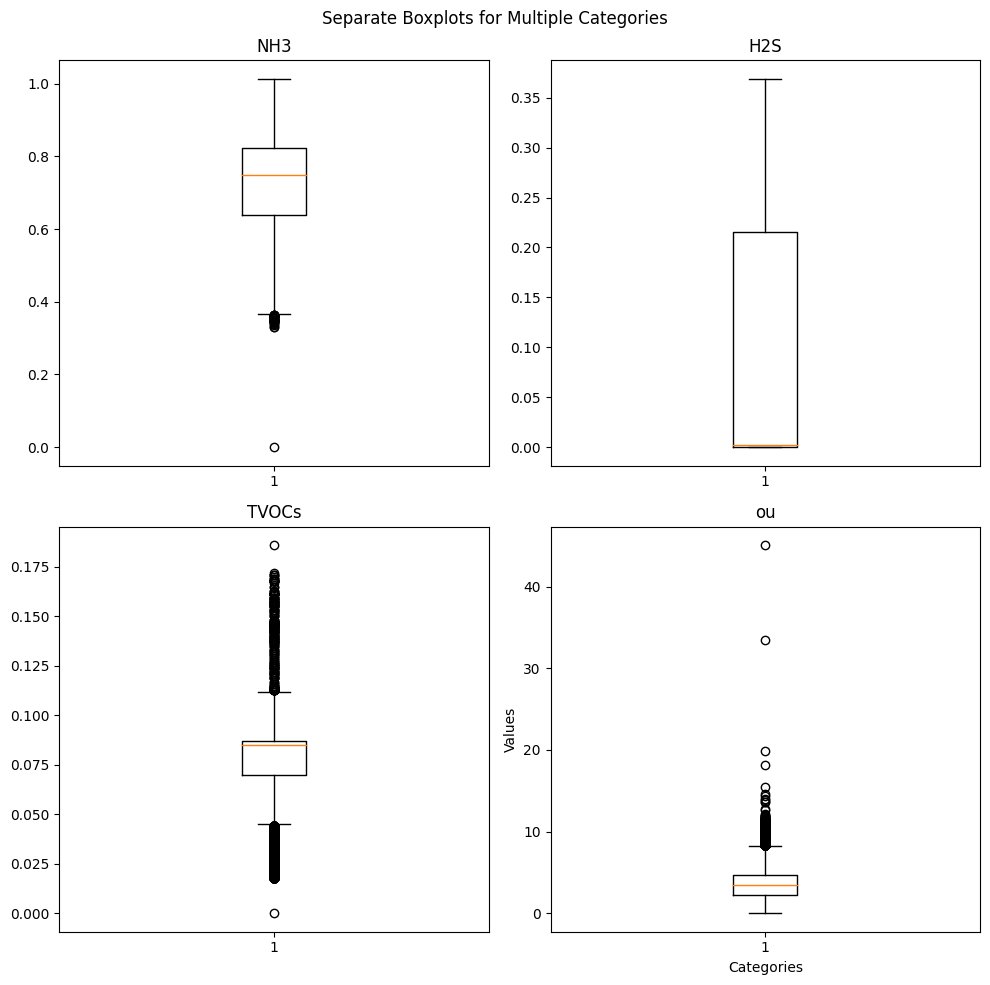

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the first boxplot
axs = axs.ravel()

axs[0].boxplot(df9['NH3'])
axs[0].set_title('NH3')

# Plot the second boxplot
axs[1].boxplot(df9['H2S'])
axs[1].set_title('H2S')

# Plot the third boxplot
axs[2].boxplot(df9['TVOCs'])
axs[2].set_title('TVOCs')

axs[3].boxplot(df9['ou'])
axs[3].set_title('ou')

# Add labels and a title to the entire figure
plt.xlabel("Categories")
plt.ylabel("Values")
plt.suptitle("Separate Boxplots for Multiple Categories")

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()



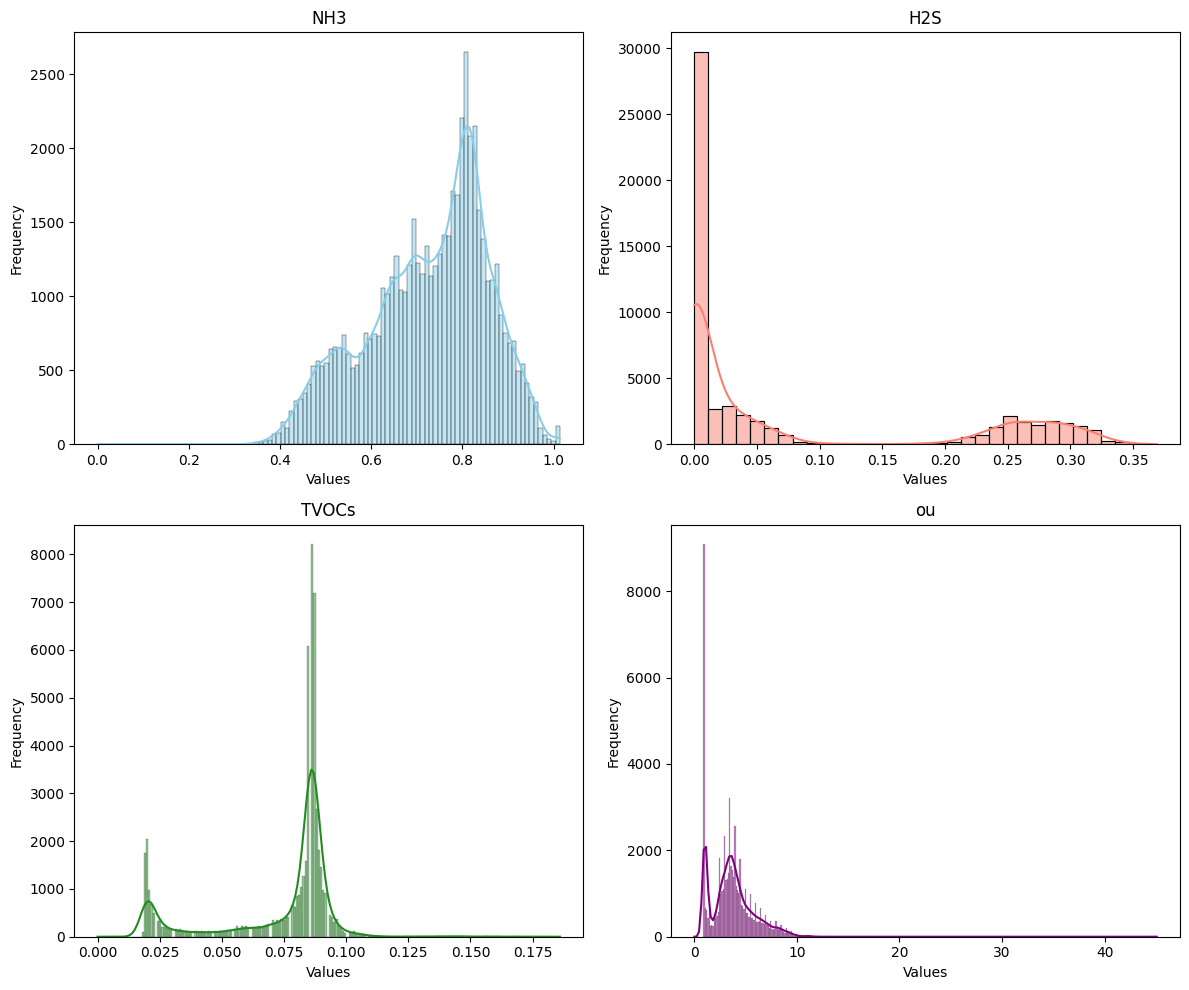

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first histogram (top-left)
sns.histplot(df9['NH3'], kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_xlabel("Values")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("NH3")

# Plot the second histogram (top-right)
sns.histplot(df9['H2S'], kde=True, color='salmon', ax=axs[0, 1])
axs[0, 1].set_xlabel("Values")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("H2S")

# Plot the third histogram (bottom-left)
sns.histplot(df9['TVOCs'], kde=True, color='forestgreen', ax=axs[1, 0])
axs[1, 0].set_xlabel("Values")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].set_title("TVOCs")

# Plot the fourth histogram (bottom-right)
sns.histplot(df9['ou'], kde=True, color='purple', ax=axs[1, 1])
axs[1, 1].set_xlabel("Values")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title("ou")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [10]:
#Threshold

df9.drop(df9[df9["ou"]>15].index, inplace=True)
df9.drop(df9[df9["TVOCs"]>0.11].index, inplace=True)
df9.drop(df9[df9["NH3"]<0.3].index, inplace=True)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your data
regressor.fit(df9[['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'atm', 'pozip']], df9['ou'])


# Get feature importances from the trained regressor
feature_importances = regressor.feature_importances_


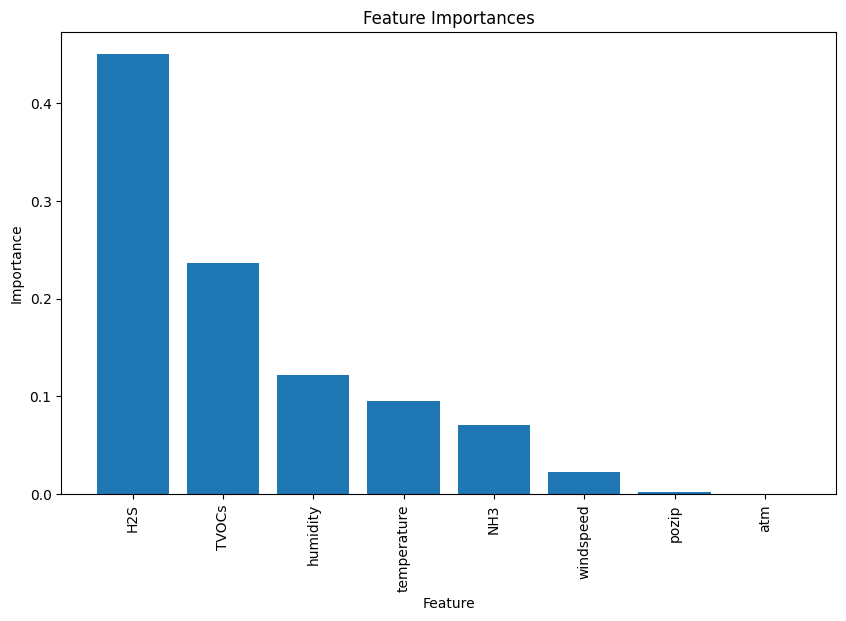

In [12]:
# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features (assuming they are in a list or DataFrame)
feature_names = df9[['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'atm', 'pozip']].columns  # Change this to your actual feature names

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
